<a href="https://colab.research.google.com/github/jinhyung426/tensorflow/blob/main/tf_chap1_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow

## Part 1. Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Callbacks

1. Inline으로 해도 가능
2. on_epoch_end function의 경우 매 epoch가 끝나고 나서 실행
3. logs.get('loss'), logs.get('mae') 등 loss 및 metrics로 설정한 것들 확인할 수 있음
4. Use 'acc' or 'accuracy' depending on tf version

In [2]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.95:
      print("Reahced 95% accuracy so stop training!\n")
      self.model.stop_training = True

callback = myCallback()

# Mnist Dataset

1. fashion_mnist는 옷, mnist는 손글씨 숫자 data
2. training_images는 6만개, testing_images는 1만개
3. 28x28x1 data


In [3]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28)
training_images = training_images / 255.0
testing_images = testing_images.reshape(10000, 28, 28)
testing_images = testing_images / 255.0

4423680/4422102 [==============================] - 0s 0us/step


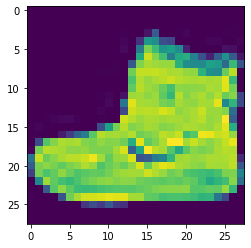

In [4]:
plt.imshow(training_images[0])

In [5]:
training_images = training_images.reshape(60000, 28, 28, 1)
testing_images = testing_images.reshape(10000, 28, 28, 1)

# Model

**1. Conv2D**
  - **Filters** : not random values but set of known "good" filters
  - Generally, more filters show better performance with slower speed (since it isolates and identifies different features per filters) but not always guarantee better performance
  - truncates 1 pixels at the corner
  - If multiple convolutional layers are used, then following convolutional layers applies convolution on top of previous convolutions

**2. Activation function**
  - ReLU : discards all negative values

**3. Input Shape**
  - Must specify if it is the first layer
  Ex) Conv2D : (28, 28, 1) = tallying color scheme as 1 byte

**4. MaxPooling**
  - technique to reduce the info in an image while maintaining highlighted features or even much more highlighting it
  - If pool_size=(2, 2) and the units are odd numbers, then rounds down
  Ex) (27, 27) -> (13, 13)

**5. Last Layer**
  - For binary classifiction problems, sigmoid > binary_crossentropy






In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               819712    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [7]:
history = model.fit(training_images, training_labels, epochs=5, callbacks=[callback])
print(history.epoch)                    # epoch 돈 횟수를 list로 반환
print(history.history['accuracy'][-1])

Epoch 1/5
1875/1875 [==============================] - 16s 5ms/step - loss: 0.5681 - accuracy: 0.7918
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2910 - accuracy: 0.8914
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2301 - accuracy: 0.9156
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1981 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1651 - accuracy: 0.9373
[0, 1, 2, 3, 4]
0.9367499947547913


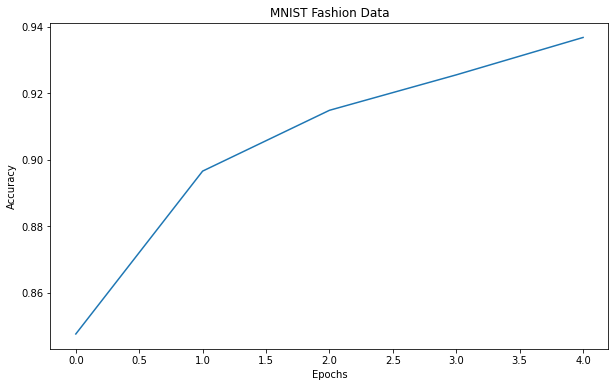

In [8]:
plt.figure(figsize=(10, 6))
plt.title("MNIST Fashion Data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.epoch, history.history['accuracy'])

# Evaluating Trained Model

In [9]:
test_loss, test_accuracy = model.evaluate(testing_images, testing_labels)
print('Test loss : {}'.format(test_loss))
print('Test Accuracy : {}%'.format(round(test_accuracy * 100, 3)))

313/313 [==============================] - 1s 3ms/step - loss: 0.2594 - accuracy: 0.9058
Test loss : 0.2594355344772339
Test Accuracy : 90.58%


# Using Trained Model



In [10]:
classifications = model.predict(testing_images)
print(classifications[0]) # returns the probabilities for each classes
print(testing_labels[0])

[1.5586876e-08 3.6692231e-07 1.2039963e-08 8.9306539e-08 3.5269077e-09
 2.3802625e-06 3.0332963e-08 3.2463076e-04 1.5787002e-09 9.9967253e-01]
9


In [13]:
num_test_cases = len(classifications)
success = 0
failure = 0

for i, result in enumerate(classifications):
  if np.argmax(result) == testing_labels[i]:
    success += 1
  else:
    failure += 1

In [16]:
print('From {} cases, {} cases have succeded and {} cases have failed'.format(num_test_cases, success, failure))
print('Accuracy : {}'.format(success / num_test_cases))  # == same with test_accuracy computed above

From 10000 cases, 9058 cases have succeded and 942 cases have failed
Accuracy : 0.9058
